# SCC0270 - Neural Networks and Deep Learning
## Second Practical Project
### Student: Eduardo Amaral
### NUSP: 11735021
#### [Project Description](https://github.com/rolimans/scc0270-p2/blob/main/projectDescription.pdf)



## Project Setup

#### Importing the necessary libraries



In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

from skimage.util import random_noise
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import to_categorical

### Downloading the SVHN train and test datasets

In [2]:
!rm -rf data
!mkdir data
!wget https://github.com/rolimans/scc0270-p2/raw/main/compressedData/data.part_aa -O data/data.part_aa -q
!wget https://github.com/rolimans/scc0270-p2/raw/main/compressedData/data.part_ab -O data/data.part_ab -q
!wget https://github.com/rolimans/scc0270-p2/raw/main/compressedData/data.part_ac -O data/data.part_ac -q
!cat data/data.part_a* > data/data.tar.gz
! tar -xf data/data.tar.gz -C data
! rm -f data/data.tar.gz data/data.part_a*


## Question 1

Create the following CNN using Keras:

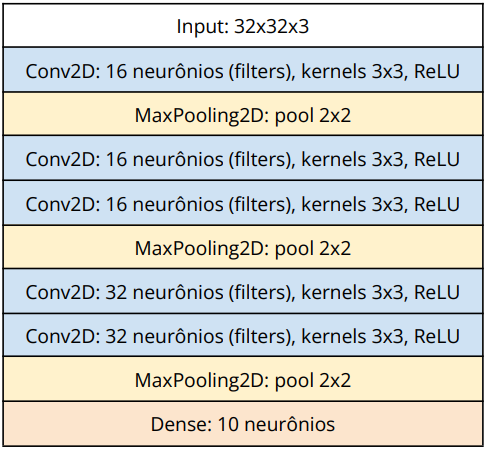

Tips:
1. Use a **Flatten** type layer to transform the output of the third max pooling into a vector
2. Use the parameter **padding=same** in **ALL** convolutional layers so that the convolution treats the image borders.

In [3]:
cnn = Sequential()

cnn.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          4

## Question 2

Load the two databases (CIFAR-10 and SVHN):

In [4]:
(c10_train_x, c10_train_y), (c10_test_x, c10_test_y) = cifar10.load_data()

svhn_train = sp.io.loadmat('data/train_32x32.mat')

svhn_train_x = svhn_train['X']
svhn_train_y = svhn_train['y']

svhn_test = sp.io.loadmat('data/test_32x32.mat')

svhn_test_x = svhn_test['X']
svhn_test_y = svhn_test['y']

### a)
When loading the CIFAR-10 and SVHN datasets you will notice that y_train and y_test have two dimensions. Transform them into vectors.

In [5]:
print(f'CIFAR-10 Initial y_train shape: {c10_train_y.shape}')

print(f'CIFAR-10 Initial y_test shape: {c10_test_y.shape}')

print(f'SVHN Initial y_train shape: {svhn_train_y.shape}')

print(f'SVHN Initial y_test shape: {svhn_test_y.shape}')

CIFAR-10 Initial y_train shape: (50000, 1)
CIFAR-10 Initial y_test shape: (10000, 1)
SVHN Initial y_train shape: (73257, 1)
SVHN Initial y_test shape: (26032, 1)


In [6]:
if len(c10_train_y.shape) == 2:
  c10_train_y = c10_train_y.reshape(-1)

if len(c10_test_y.shape) == 2:
  c10_test_y = c10_test_y.reshape(-1)

if len(svhn_train_y.shape) == 2:
  svhn_train_y = svhn_train_y.reshape(-1)

if len(svhn_test_y.shape) == 2:
  svhn_test_y = svhn_test_y.reshape(-1)

print(f'CIFAR-10 Final y_train shape: {c10_train_y.shape}')

print(f'CIFAR-10 Final y_test shape: {c10_test_y.shape}')

print(f'SVHN Final y_train shape: {svhn_train_y.shape}')

print(f'SVHN Final y_test shape: {svhn_test_y.shape}')

CIFAR-10 Final y_train shape: (50000,)
CIFAR-10 Final y_test shape: (10000,)
SVHN Final y_train shape: (73257,)
SVHN Final y_test shape: (26032,)


### b)
When loading the SVHN dataset and understanding it's structure you will notice that X_train and X_test are with the dimensions in a different order that the Keras uses by default. Transfor those arrays into the common used order (image id, line, collumns and channels)

In [7]:
print(f'Initial x_train shape: {svhn_train_x.shape}')

print(f'Initial x_test shape: {svhn_test_x.shape}')

Initial x_train shape: (32, 32, 3, 73257)
Initial x_test shape: (32, 32, 3, 26032)


In [8]:
svhn_train_x = np.transpose(svhn_train_x, (3,0,1,2))
svhn_test_x = np.transpose(svhn_test_x, (3,0,1,2))

In [9]:
print(f'Final x_train shape: {svhn_train_x.shape}')

print(f'Final x_test shape: {svhn_test_x.shape}')

Final x_train shape: (73257, 32, 32, 3)
Final x_test shape: (26032, 32, 32, 3)


### c)
Transform the pixel values to the interval [0; 1]

In [10]:
print(f'Initial svhn_train_x min: {svhn_train_x.min()} and max: {svhn_train_x.max()}')
print(f'Initial svhn_test_x min: {svhn_test_x.min()} and max: {svhn_test_x.max()}')

print(f'Initial c10_train_x min: {c10_train_x.min()} and max: {c10_train_x.max()}')
print(f'Initial c10_test_x min: {c10_test_x.min()} and max: {c10_test_x.max()}')

Initial svhn_train_x min: 0 and max: 255
Initial svhn_test_x min: 0 and max: 255
Initial c10_train_x min: 0 and max: 255
Initial c10_test_x min: 0 and max: 255


In [11]:
svhn_train_x = svhn_train_x/255
svhn_test_x = svhn_test_x/255

c10_train_x = c10_train_x/255
c10_test_x = c10_test_x/255

In [12]:
print(f'Initial svhn_train_x min: {svhn_train_x.min()} and max: {svhn_train_x.max()}')
print(f'Initial svhn_test_x min: {svhn_test_x.min()} and max: {svhn_test_x.max()}')

print(f'Initial c10_train_x min: {c10_train_x.min()} and max: {c10_train_x.max()}')
print(f'Initial c10_test_x min: {c10_test_x.min()} and max: {c10_test_x.max()}')

Initial svhn_train_x min: 0.0 and max: 1.0
Initial svhn_test_x min: 0.0 and max: 1.0
Initial c10_train_x min: 0.0 and max: 1.0
Initial c10_test_x min: 0.0 and max: 1.0


Converting the dataset's datatype to use less memory

In [13]:
svhn_train_x = svhn_train_x.astype(np.float16)
svhn_test_x = svhn_test_x.astype(np.float16)

svhn_train_y = svhn_train_y.astype(np.uint8)
svhn_test_y = svhn_test_y.astype(np.uint8)

c10_train_x = c10_train_x.astype(np.float16)
c10_test_x = c10_test_x.astype(np.float16)

c10_train_y = c10_train_y.astype(np.uint8)
c10_test_y = c10_test_y.astype(np.uint8)

The SVHN dataset labels are from 1 to 10. Let's convert them to 0 to 9, so it is easier to hot encode later.

In [14]:
svhn_train_y = svhn_train_y - 1
svhn_test_y = svhn_test_y - 1

### d)
For each dataset, calculate:
- Quantity of train and test images
- Size (number of lines, collumns and channels) of the images
- Classes distribution


In [15]:
print(f'# of train images on the SVHN dataset: {len(svhn_train_x)}')
print(f'# of test images on the SVHN dataset: {len(svhn_test_x)}')

print(f'# of train images on the CIFAR-10 dataset: {len(c10_train_x)}')
print(f'# of test images on the CIFAR-10 dataset: {len(c10_test_x)}')

# of train images on the SVHN dataset: 73257
# of test images on the SVHN dataset: 26032
# of train images on the CIFAR-10 dataset: 50000
# of test images on the CIFAR-10 dataset: 10000


In [16]:
print(f'The SVHN dataset is composed of images with {svhn_train_x.shape[1]} lines, {svhn_train_x.shape[2]} collumns and  {svhn_train_x.shape[3]} channels.')

print(f'The CIFAR-10 dataset is composed of images with {c10_train_x.shape[1]} lines, {c10_train_x.shape[2]} collumns and  {c10_train_x.shape[3]} channels.')

The SVHN dataset is composed of images with 32 lines, 32 collumns and  3 channels.
The CIFAR-10 dataset is composed of images with 32 lines, 32 collumns and  3 channels.


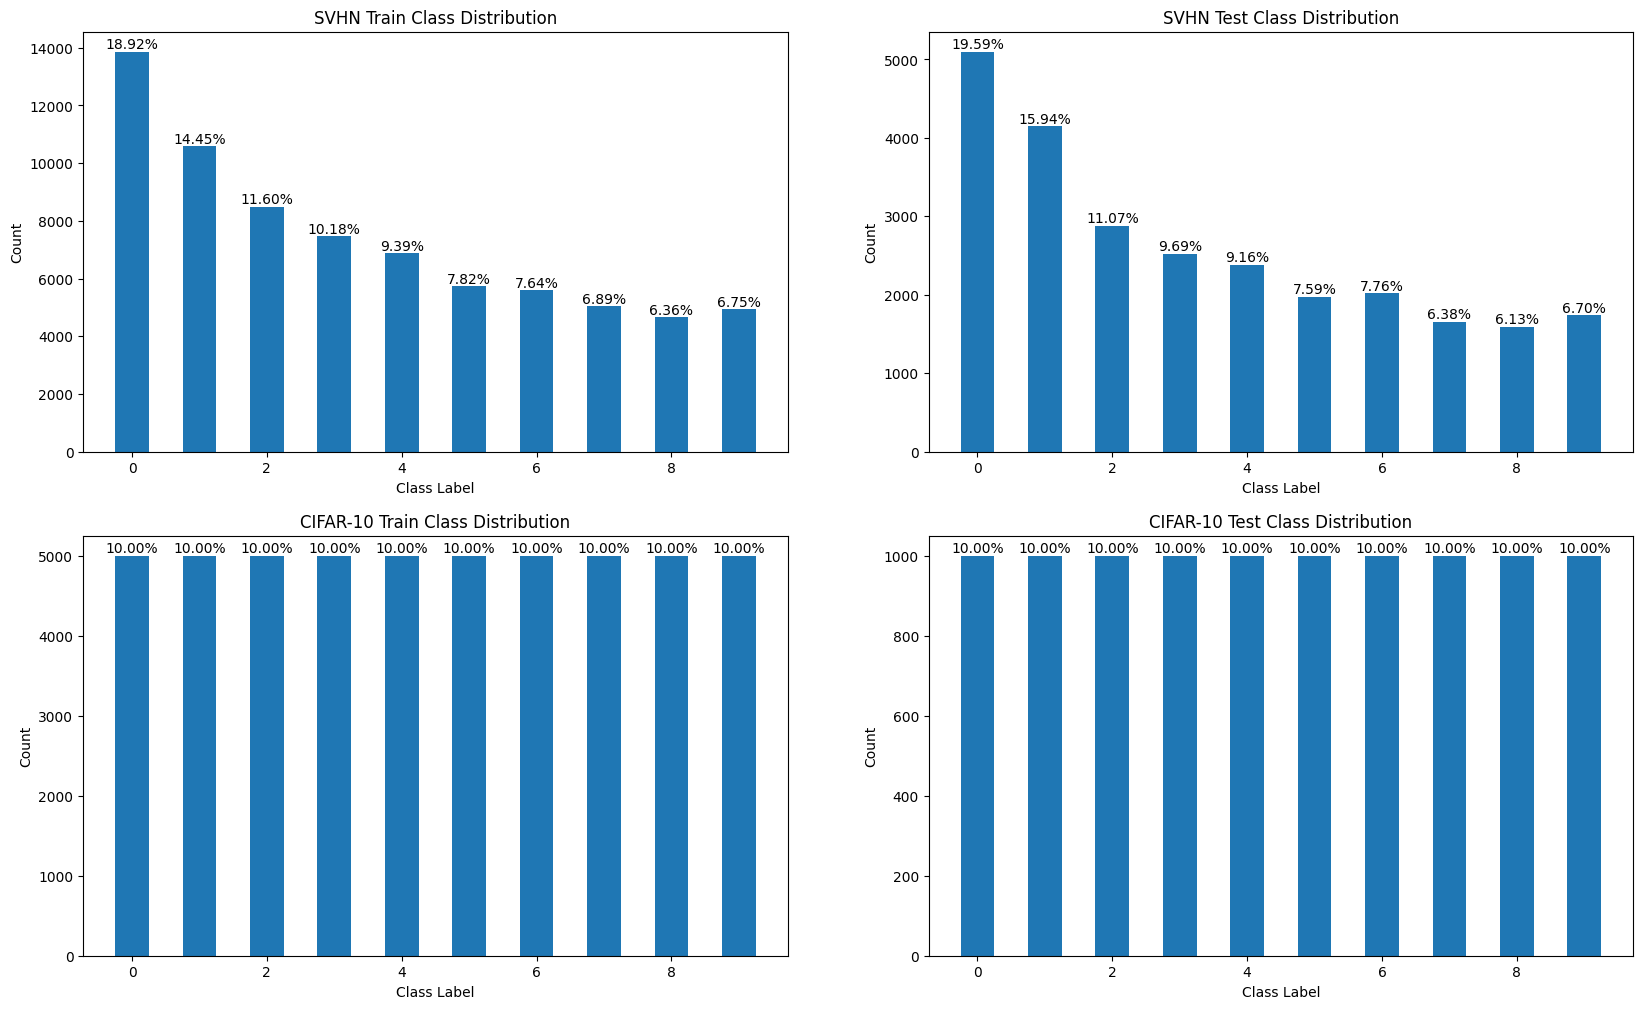

In [17]:
svhn_train_labels, svhn_train_counts = np.unique(svhn_train_y, return_counts=True)
svhn_train_pcts = (svhn_train_counts / len(svhn_train_y)) * 100

svhn_test_labels, svhn_test_counts = np.unique(svhn_test_y, return_counts=True)
svhn_test_pcts = (svhn_test_counts / len(svhn_test_y)) * 100

c10_train_labels, c10_train_counts = np.unique(c10_train_y, return_counts=True)
c10_train_pcts = (c10_train_counts / len(c10_train_y)) * 100

c10_test_labels, c10_test_counts = np.unique(c10_test_y, return_counts=True)
c10_test_pcts = (c10_test_counts / len(c10_test_y)) * 100

fig, axs = plt.subplots(2, 2, figsize=(20, 12))

axs[0, 0].bar(svhn_train_labels, svhn_train_counts, width=0.5)
axs[0, 0].set_title('SVHN Train Class Distribution')
axs[0, 0].set_xlabel('Class Label')
axs[0, 0].set_ylabel('Count')
for i, v in enumerate(svhn_train_pcts):
    axs[0, 0].text(svhn_train_labels[i], svhn_train_counts[i], f'{v:.2f}%', ha='center', va='bottom')

axs[0, 1].bar(svhn_test_labels, svhn_test_counts, width=0.5)
axs[0, 1].set_title('SVHN Test Class Distribution')
axs[0, 1].set_xlabel('Class Label')
axs[0, 1].set_ylabel('Count')
for i, v in enumerate(svhn_test_pcts):
    axs[0, 1].text(svhn_test_labels[i], svhn_test_counts[i], f'{v:.2f}%', ha='center', va='bottom')

axs[1, 0].bar(c10_train_labels, c10_train_counts, width=0.5)
axs[1, 0].set_title('CIFAR-10 Train Class Distribution')
axs[1, 0].set_xlabel('Class Label')
axs[1, 0].set_ylabel('Count')
for i, v in enumerate(c10_train_pcts):
    axs[1, 0].text(c10_train_labels[i], c10_train_counts[i], f'{v:.2f}%', ha='center', va='bottom')

axs[1, 1].bar(c10_test_labels, c10_test_counts, width=0.5)
axs[1, 1].set_title('CIFAR-10 Test Class Distribution')
axs[1, 1].set_xlabel('Class Label')
axs[1, 1].set_ylabel('Count')
for i, v in enumerate(c10_test_pcts):
    axs[1, 1].text(c10_test_labels[i], c10_test_counts[i], f'{v:.2f}%', ha='center', va='bottom')

# plt.tight_layout()

plt.show()

After analyzing the Class Distribution on each datatset we can conclude that the CIFAR-10 classes are evenly distributed both in the train and test datasets. The SVHN classes on the other hand are not evenly distributed (the greater the class number, the less samples of it are available), but it is also important to notice that the distrubition of the train and test datasets are very similiar, what is enough so we do not have to change the distribution.

## Question 3

Let's generate noisy versions of each database and check how it affects visual quality.

##a)
Generate versions of each dataset affected by gausssian noise with variances of 0.001 and 0.01.

In [18]:
svhn_train_x_noisy_001 = random_noise(svhn_train_x, var=0.001)
svhn_train_x_noisy_001 = svhn_train_x_noisy_001.astype(np.float16)

svhn_train_x_noisy_01 = random_noise(svhn_train_x, var=0.01)
svhn_train_x_noisy_01 = svhn_train_x_noisy_01.astype(np.float16)


svhn_test_x_noisy_001 = random_noise(svhn_test_x, var=0.001)
svhn_test_x_noisy_001 = svhn_test_x_noisy_001.astype(np.float16)

svhn_test_x_noisy_01 = random_noise(svhn_test_x, var=0.01)
svhn_test_x_noisy_01 = svhn_test_x_noisy_01.astype(np.float16)


c10_train_x_noisy_001 = random_noise(c10_train_x, var=0.001)
c10_train_x_noisy_001 = c10_train_x_noisy_001.astype(np.float16)

c10_train_x_noisy_01 = random_noise(c10_train_x, var=0.01)
c10_train_x_noisy_01 = c10_train_x_noisy_01.astype(np.float16)


c10_test_x_noisy_001 = random_noise(c10_test_x, var=0.001)
c10_test_x_noisy_001 = c10_test_x_noisy_001.astype(np.float16)

c10_test_x_noisy_01 = random_noise(c10_test_x, var=0.01)
c10_test_x_noisy_01 = c10_test_x_noisy_01.astype(np.float16)


### b)
Show a image of each one of the classes in 3 versions (original, Gauss 0.001 and Gauss 0.01). This should be done for the two datasets.

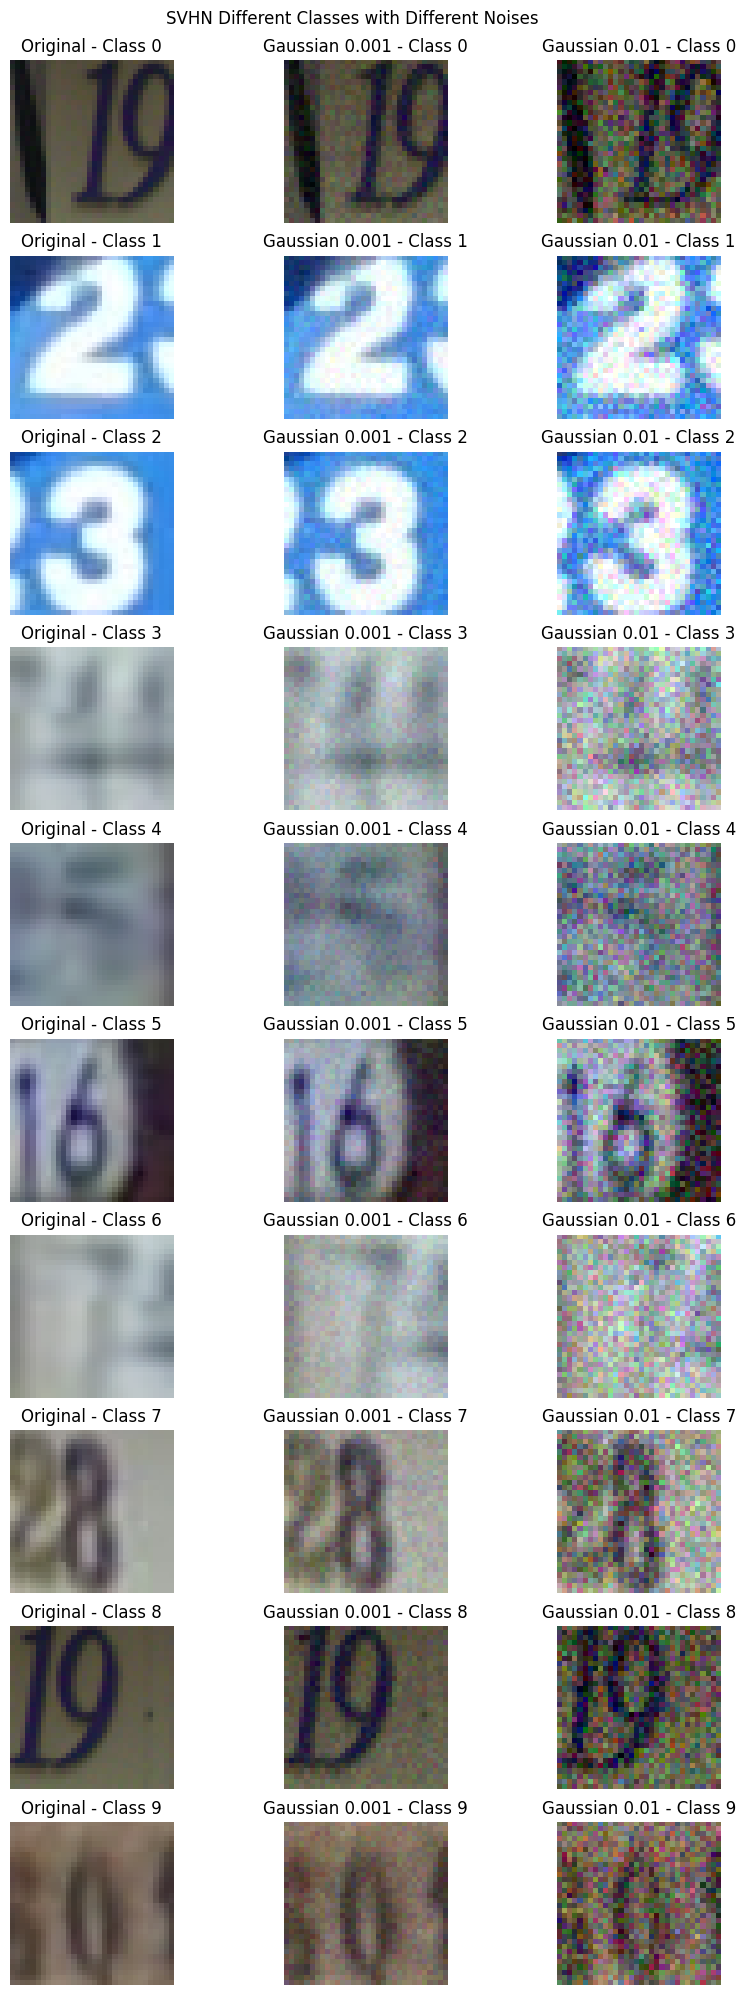

In [19]:
svhn_labels = np.unique(svhn_train_y)

fig, axes = plt.subplots(len(svhn_labels), 3, figsize=(10, 25))

for i, label in enumerate(svhn_labels):

    idx = np.where(svhn_train_y == label)[0][0]

    axes[i, 0].imshow((svhn_train_x[idx]).astype(np.float64))
    axes[i, 0].set_title(f'Original - Class {label}')
    axes[i, 0].axis('off')


    axes[i, 1].imshow((svhn_train_x_noisy_001[idx]).astype(np.float64))
    axes[i, 1].set_title(f'Gaussian 0.001 - Class {label}')
    axes[i, 1].axis('off')


    axes[i, 2].imshow((svhn_train_x_noisy_01[idx]).astype(np.float64))
    axes[i, 2].set_title(f'Gaussian 0.01 - Class {label}')
    axes[i, 2].axis('off')

plt.suptitle("SVHN Different Classes with Different Noises", y=0.9)

plt.show()

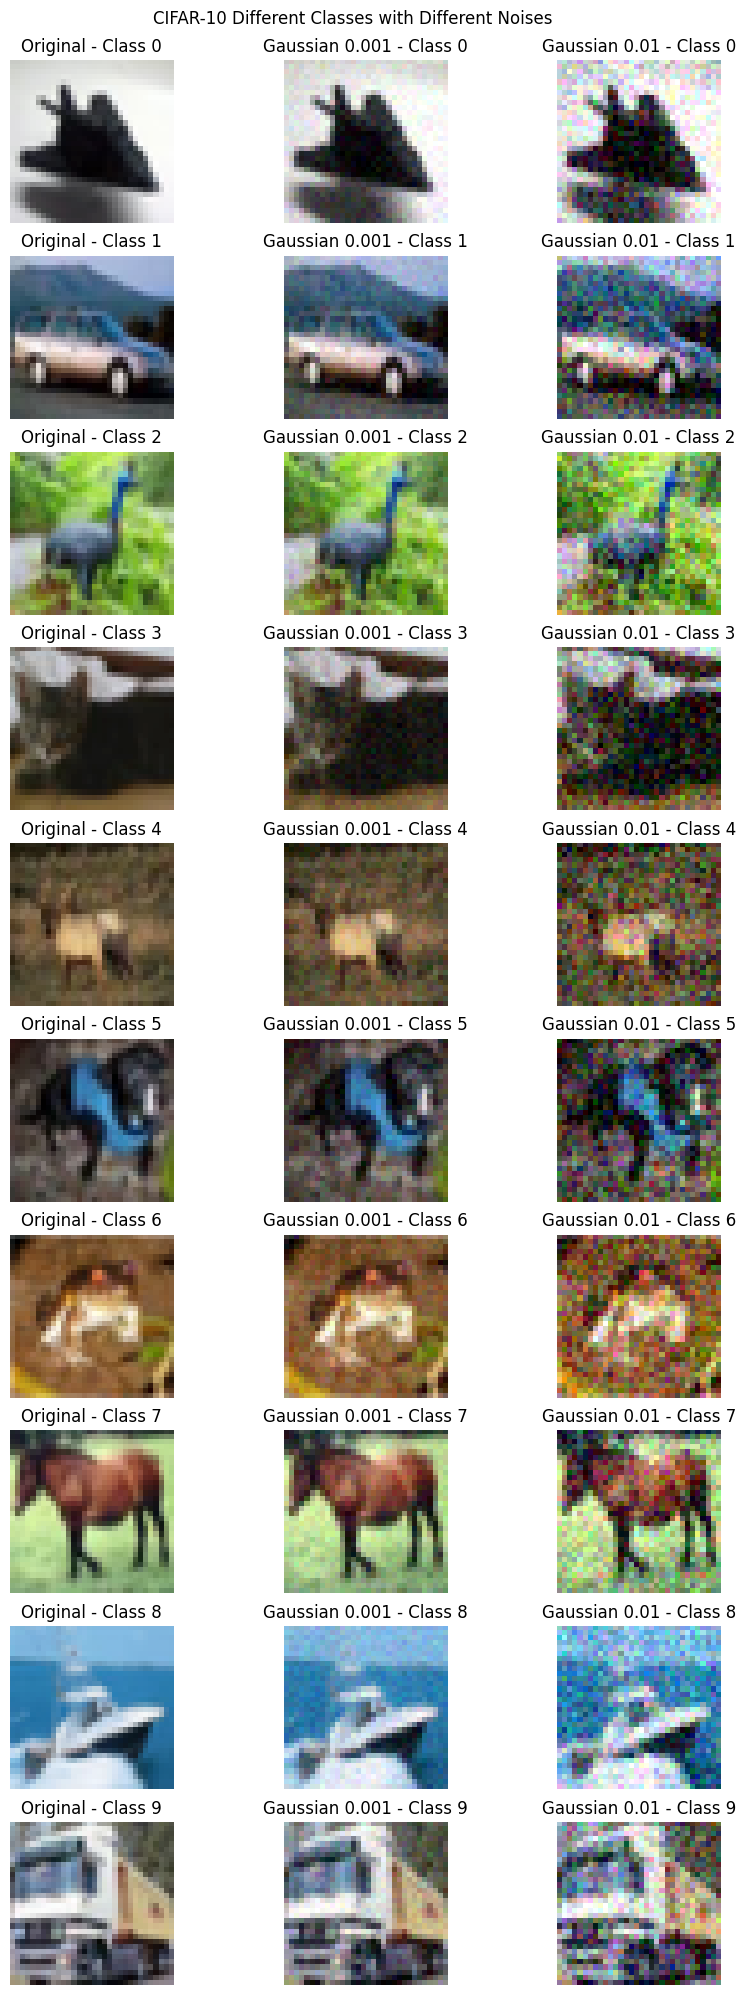

In [20]:
c10_labels = np.unique(c10_train_y)

fig, axes = plt.subplots(len(c10_labels), 3, figsize=(10, 25))

for i, label in enumerate(c10_labels):

    idx = np.where(c10_train_y == label)[0][0]

    axes[i, 0].imshow((c10_train_x[idx]).astype(np.float64))
    axes[i, 0].set_title(f'Original - Class {label}')
    axes[i, 0].axis('off')


    axes[i, 1].imshow((c10_train_x_noisy_001[idx]).astype(np.float64))
    axes[i, 1].set_title(f'Gaussian 0.001 - Class {label}')
    axes[i, 1].axis('off')


    axes[i, 2].imshow((c10_train_x_noisy_01[idx]).astype(np.float64))
    axes[i, 2].set_title(f'Gaussian 0.01 - Class {label}')
    axes[i, 2].axis('off')

plt.suptitle("CIFAR-10 Different Classes with Different Noises", y=0.9)

plt.show()

## Question 4

Train a model version for each dataset version.

This means you should train the following six models:

1. Model trained in the original CIFAR-10
2. Model trained in the Gauss 0.001 CIFAR-10
3. Model trained in the Gauss 0.01 CIFAR-10
4. Model trained in the original SVHN
5. Model trained in the Gauss 0.001 SVHN
6. Model trained in the Gauss 0.01 SVHN

All the models must be trained using:
- Adam as an optimizer
- For 10 epochs
- The remaining parameters should be left as default

Tip:
- You can save the models and the reload them with the functions save and model. Take a look at the Keras documentation.

In [21]:
models = [
    ("svhn_original", svhn_train_x, svhn_train_y),
    ("svhn_gaussian_0.001", svhn_train_x_noisy_001, svhn_train_y),
    ("svhn_gaussian_0.01", svhn_train_x_noisy_01, svhn_train_y),
    ("c10_original", c10_train_x, c10_train_y),
    ("c10_gaussian_0.001", c10_train_x_noisy_001, c10_train_y),
    ("c10_gaussian_0.01", c10_train_x_noisy_01, c10_train_y),
]

for model in models:

  name, train_x, train_y = model

  print(f'Training model: {name}')

  train_y = to_categorical(train_y)

  clear_session()

  cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  cnn.fit(train_x, train_y, epochs=10, verbose=2)

  cnn.save(f'models/{name}.h5')

Training model: svhn_original
Epoch 1/10
2290/2290 - 14s - loss: 0.8866 - accuracy: 0.7123 - 14s/epoch - 6ms/step
Epoch 2/10
2290/2290 - 11s - loss: 0.4289 - accuracy: 0.8743 - 11s/epoch - 5ms/step
Epoch 3/10
2290/2290 - 9s - loss: 0.3596 - accuracy: 0.8943 - 9s/epoch - 4ms/step
Epoch 4/10
2290/2290 - 9s - loss: 0.3218 - accuracy: 0.9052 - 9s/epoch - 4ms/step
Epoch 5/10
2290/2290 - 10s - loss: 0.2960 - accuracy: 0.9139 - 10s/epoch - 4ms/step
Epoch 6/10
2290/2290 - 10s - loss: 0.2772 - accuracy: 0.9182 - 10s/epoch - 4ms/step
Epoch 7/10
2290/2290 - 10s - loss: 0.2632 - accuracy: 0.9222 - 10s/epoch - 4ms/step
Epoch 8/10
2290/2290 - 9s - loss: 0.2498 - accuracy: 0.9256 - 9s/epoch - 4ms/step
Epoch 9/10
2290/2290 - 10s - loss: 0.2368 - accuracy: 0.9305 - 10s/epoch - 4ms/step
Epoch 10/10
2290/2290 - 10s - loss: 0.2289 - accuracy: 0.9323 - 10s/epoch - 4ms/step
Training model: svhn_gaussian_0.001
Epoch 1/10
2290/2290 - 12s - loss: 0.2568 - accuracy: 0.9221 - 12s/epoch - 5ms/step
Epoch 2/10
2290

## Question 5

Now let's try to understend the impacts of the noise in the accuracy of the models by doing the following experiments:

### a)
Measure the accuracy of the models in every test dataset. For example, for the model trained with the CIFAR-10 original training dataset we should measure its accuracy on the original test dataset, Gauss 0.001 test dataset and Gauss 0.01 dataset. That means that for every model we should measure 3 accuracies.

In [22]:
results = []

svhn_variations = [
  ("svhn_original", svhn_test_x, svhn_test_y, 'SVHN Original'),
  ("svhn_gaussian_0.001", svhn_test_x_noisy_001, svhn_test_y, 'SVHN Gauss 0.001'),
  ("svhn_gaussian_0.01", svhn_test_x_noisy_01, svhn_test_y, 'SVHN Gauss 0.01'),
]

c10_variations = [
  ("c10_original", c10_test_x, c10_test_y, 'CIFAR-10 Original'),
  ("c10_gaussian_0.001", c10_test_x_noisy_001, c10_test_y, 'CIFAR-10 Gauss 0.001'),
  ("c10_gaussian_0.01", c10_test_x_noisy_01, c10_test_y, 'CIFAR-10 Gauss 0.01'),
]

datasets_variations = [svhn_variations, c10_variations]

for variations in datasets_variations:
  for model_name, _, _, model_title in variations:
    cnn = load_model(f'models/{model_name}.h5')
    for dataset_name, test_x, test_y, dataset_title in variations:

      print(f'Model: {model_title} vs Dataset: {dataset_title}')

      test_y = to_categorical(test_y)

      _, accuracy = cnn.evaluate(test_x, test_y, verbose=1)

      results.append({
          "model": model_title,
          "dataset": dataset_title,
          "accuracy": accuracy
      })

Model: SVHN Original vs Dataset: SVHN Original
814/814 [==============================] - 3s 3ms/step - loss: 0.3746 - accuracy: 0.8931
Model: SVHN Original vs Dataset: SVHN Gauss 0.001
814/814 [==============================] - 2s 3ms/step - loss: 0.4106 - accuracy: 0.8814
Model: SVHN Original vs Dataset: SVHN Gauss 0.01
814/814 [==============================] - 2s 3ms/step - loss: 0.7724 - accuracy: 0.7605
Model: SVHN Gauss 0.001 vs Dataset: SVHN Original
814/814 [==============================] - 2s 3ms/step - loss: 0.4101 - accuracy: 0.8999
Model: SVHN Gauss 0.001 vs Dataset: SVHN Gauss 0.001
814/814 [==============================] - 3s 3ms/step - loss: 0.4272 - accuracy: 0.8916
Model: SVHN Gauss 0.001 vs Dataset: SVHN Gauss 0.01
814/814 [==============================] - 2s 3ms/step - loss: 0.7376 - accuracy: 0.7980
Model: SVHN Gauss 0.01 vs Dataset: SVHN Original
814/814 [==============================] - 3s 3ms/step - loss: 0.4388 - accuracy: 0.8776
Model: SVHN Gauss 0.01 vs D

In [23]:
titles = [title for variations in datasets_variations for _,_,_, title in variations]
colors = ['red','green', 'blue', 'brown','pink','black']

accuracies_by_dataset = {}
accuracies_by_model = {}

for title in titles:
    accuracies_by_dataset[title] = [(r['model'],r['accuracy']) for r in results if r['dataset'] == title]
    accuracies_by_model[title] = [(r['dataset'],r['accuracy']) for r in results if r['model'] == title]

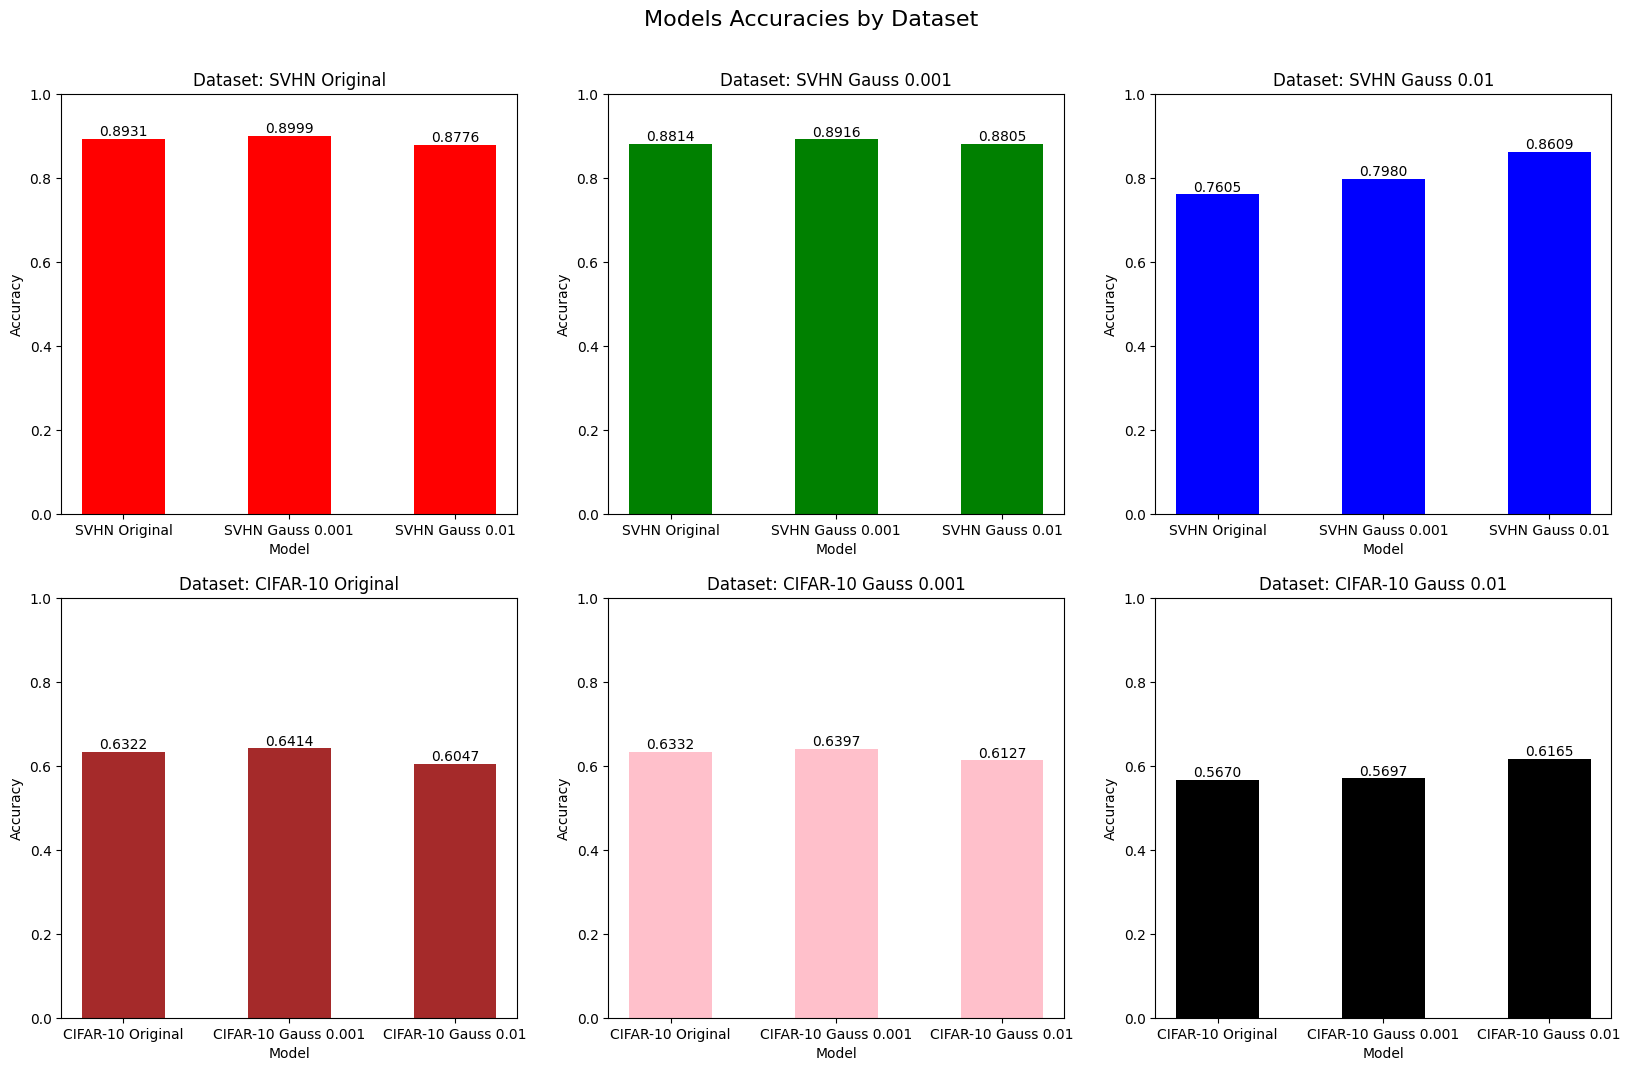

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for i, dataset in enumerate(titles):

    r = accuracies_by_dataset[dataset]

    models = [model for model,_ in r]

    accuracies = [accuracy for _,accuracy in r]

    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.bar(models,accuracies, width=0.5, color=colors[i])
    for model, accuracy in zip(models, accuracies):
      ax.text(model, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')
    ax.set_ylim([0, 1])
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')

plt.suptitle('Models Accuracies by Dataset', fontsize=16, y=0.95)

plt.show()

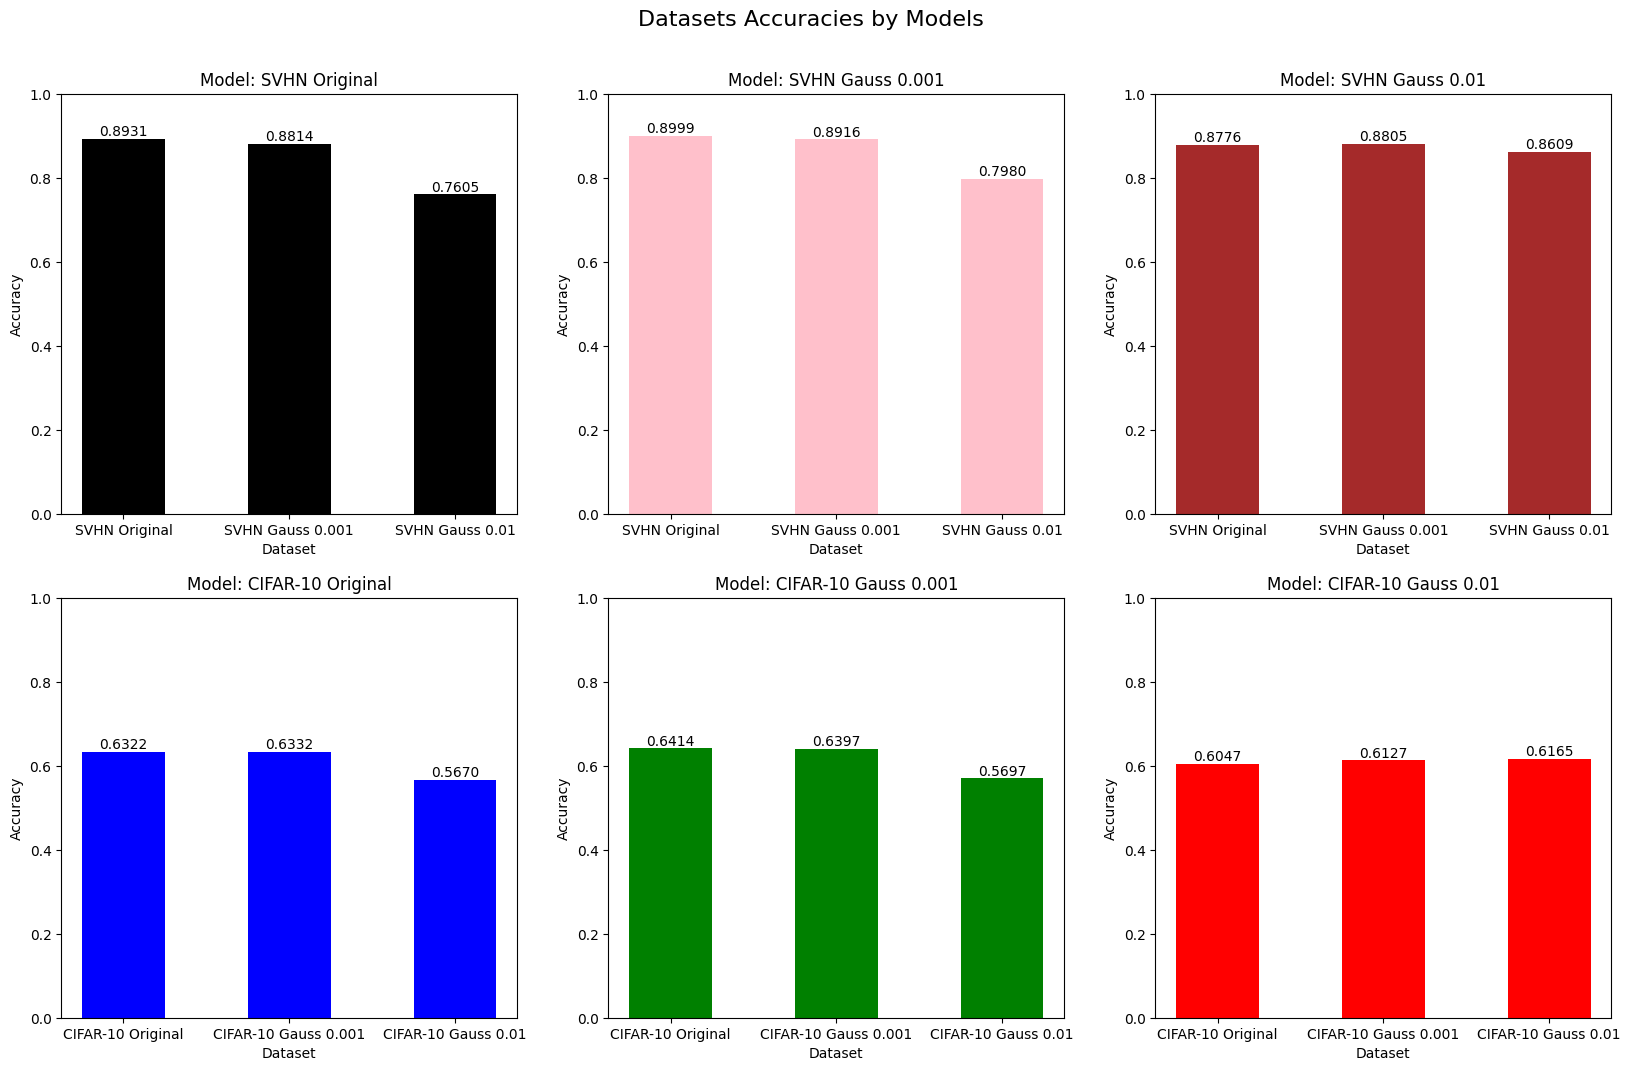

In [25]:
reversed_colors = list(reversed(colors))

fig, axs = plt.subplots(2, 3, figsize=(20, 12))

for i, model in enumerate(titles):

    r = accuracies_by_model[model]

    datasets = [dataset for dataset,_ in r]

    accuracies = [accuracy for _,accuracy in r]

    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.bar(datasets, accuracies, width=0.5, color=reversed_colors[i])
    for dataset, accuracy in zip(datasets, accuracies):
      ax.text(dataset, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')
    ax.set_ylim([0, 1])
    ax.set_title(f"Model: {model}")
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Accuracy')

plt.suptitle('Datasets Accuracies by Models', fontsize=16, y=0.95)

plt.show()

In [26]:
mean_accuracy_by_model = {}

for model in titles:
  accuracies = accuracies_by_model[model]
  mean_accuracy_by_model[model] = np.mean([acc for _, acc in accuracies])

pd.DataFrame(mean_accuracy_by_model.values(), mean_accuracy_by_model.keys())

,0
SVHN Original,0.845011
SVHN Gauss 0.001,0.863156
SVHN Gauss 0.01,0.873002
CIFAR-10 Original,0.610800
CIFAR-10 Gauss 0.001,0.616933
CIFAR-10 Gauss 0.01,0.611300


### b)
Based on this results, discuss wich of the following affirmations explains the most the accuracies variation of the experiments:

- i) The noise makes the problem harder, thus it is harder for the model to learn with noisy data
- ii) When a model is exposed to very different data from the ones it trained (e.g. with a lot of noise) it's accuracy may decrease.

The affirmative that explains the most the variations is the second one.

The first affirmative does not reflect the reality so well, because as the results show, the models trained with noisy data usually have a better average perfomance than others (the greater the noise on training, the greater the average performance). Models trained with less noise tend to struggle more with noisy data than models trained with more noise do with non-noisy data.

It is also noticeable that most of the times, the model best performance is obtained when exposed to the same dataset it was trained. The more different the exposed dataset is from the one the model trained, the worst the model usually performs. The models that have the greater decrease in performance when dealing with different data from the ones they trained are the models trained with less noise. This observations support the second affirmative and contradict the first one.